In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from api_keys import api_key

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

units = "metric"

In [75]:
# List for holding lat_lngs and cities

cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
# Create tuples of lats and lngs
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # lat_lng[0] - latitude
    # lat_lng[1] - longitude
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
len(cities)

763

In [76]:
cities_df = pd.DataFrame({"City": cities})
cities_df['Cloudiness']= ""
cities_df['Country']= ""
cities_df['Date']= ""
cities_df['Humidty']= ""
cities_df['Lat']= ""
cities_df['Lng']= ""
cities_df['Max Temp']= ""
cities_df['Wind Speed']= ""

cities_df.head()

,City,Cloudiness,Country,Date,Humidty,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,,,,,,,,
1,kodiak,,,,,,,,
2,gander,,,,,,,,
3,meyungs,,,,,,,,
4,mataura,,,,,,,,


In [78]:
base_url = "http://api.openweathermap.org/data/2.5/weather?appid={0}&q={1}&units={2}"
base_url

'http://api.openweathermap.org/data/2.5/weather?appid={0}&q={1}&units={2}'

In [79]:
for index, row in cities_df.iterrows():
    city_url = base_url.format(api_key, row['City'], units)
    city_request = requests.get(city_url).json()
    
    try:
        
        cities_df.loc[index, 'Cloudiness'] = city_request['clouds']['all']
        cities_df.loc[index, 'Country'] = city_request['sys']['country']
        cities_df.loc[index, 'Date'] = city_request['dt']
        cities_df.loc[index, 'Humidity'] = city_request['main']['humidity']
        cities_df.loc[index, 'Lat'] = city_request['coord']['lat']
        cities_df.loc[index, 'Lng'] = city_request['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = city_request['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = city_request['wind']['speed']
        
        print("Processing Record " + str(index+1) + " | " + str(row['City']))
   
    except(KeyError, IndexError):
        print("City not found. Skipping...")
    
    

Processing Record 1 | ushuaia
Processing Record 2 | kodiak
Processing Record 3 | gander
City not found. Skipping...
Processing Record 5 | mataura
Processing Record 6 | rikitea
Processing Record 7 | port hedland
Processing Record 8 | tilichiki
Processing Record 9 | narsaq
Processing Record 10 | geraldton
Processing Record 11 | parabel
Processing Record 12 | santa cruz
Processing Record 13 | lagoa
Processing Record 14 | ketchikan
Processing Record 15 | poum
Processing Record 16 | bluff
Processing Record 17 | saint anthony
Processing Record 18 | busselton
Processing Record 19 | georgetown
Processing Record 20 | punta arenas
Processing Record 21 | riacho de santana
Processing Record 22 | airai
Processing Record 23 | fallon
Processing Record 24 | villa maria
Processing Record 25 | avarua
Processing Record 26 | hilo
Processing Record 27 | tiksi
Processing Record 28 | qaanaaq
Processing Record 29 | port alfred
Processing Record 30 | lhokseumawe
Processing Record 31 | yellowknife
Processing Re

Processing Record 255 | leningradskiy
Processing Record 256 | vinstra
Processing Record 257 | pueblo
Processing Record 258 | avera
Processing Record 259 | kitimat
Processing Record 260 | sitka
Processing Record 261 | port blair
Processing Record 262 | azare
Processing Record 263 | namatanai
Processing Record 264 | craig
Processing Record 265 | tiznit
Processing Record 266 | mareeba
City not found. Skipping...
Processing Record 268 | corinto
Processing Record 269 | verkhoyansk
Processing Record 270 | aklavik
Processing Record 271 | lupiro
Processing Record 272 | kanniyakumari
Processing Record 273 | solnechnyy
Processing Record 274 | cidreira
Processing Record 275 | port moresby
Processing Record 276 | amuntai
Processing Record 277 | vashkivtsi
Processing Record 278 | umm kaddadah
Processing Record 279 | college
Processing Record 280 | grand gaube
Processing Record 281 | florianopolis
Processing Record 282 | razole
Processing Record 283 | puerto ayora
Processing Record 284 | manicore
Pr

Processing Record 505 | regina
Processing Record 506 | gamba
Processing Record 507 | mae ramat
Processing Record 508 | kaura namoda
Processing Record 509 | praia da vitoria
Processing Record 510 | thinadhoo
Processing Record 511 | aktau
Processing Record 512 | matara
Processing Record 513 | trujillo
City not found. Skipping...
Processing Record 515 | novobirilyussy
Processing Record 516 | pangkalanbuun
Processing Record 517 | cotonou
Processing Record 518 | gusau
Processing Record 519 | san carlos de bariloche
City not found. Skipping...
Processing Record 521 | ipswich
Processing Record 522 | vondrozo
City not found. Skipping...
Processing Record 524 | waitati
Processing Record 525 | oda
Processing Record 526 | kieta
Processing Record 527 | cardinal
Processing Record 528 | adrar
Processing Record 529 | nebyliv
Processing Record 530 | kaseda
Processing Record 531 | shingu
Processing Record 532 | southbridge
Processing Record 533 | ballina
Processing Record 534 | vetlanda
Processing Reco

Processing Record 758 | turayf
Processing Record 759 | black forest
Processing Record 760 | asyut
Processing Record 761 | sinnamary
Processing Record 762 | manyana
Processing Record 763 | abha


In [80]:
cities_df.count()

City          763
Cloudiness    763
Country       763
Date          763
Humidty       763
Lat           763
Lng           763
Max Temp      763
Wind Speed    763
Humidity      688
dtype: int64

In [87]:
cities_df = cities_df.dropna(how='any')
cities_df.count()

City          688
Cloudiness    688
Country       688
Date          688
Humidty       688
Lat           688
Lng           688
Max Temp      688
Wind Speed    688
Humidity      688
dtype: int64

In [88]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidty,Lat,Lng,Max Temp,Wind Speed,Humidity
0,ushuaia,75,AR,1541404800,,-54.81,-68.31,4,9.8,80.0
1,kodiak,1,US,1541404380,,39.95,-94.76,4.4,4.1,92.0
2,gander,75,CA,1541408400,,48.95,-54.61,0,7.2,99.0
4,mataura,0,NZ,1541410092,,-46.19,168.86,11.15,3.06,69.0
5,rikitea,0,PF,1541410093,,-23.12,-134.97,23.15,6.91,100.0


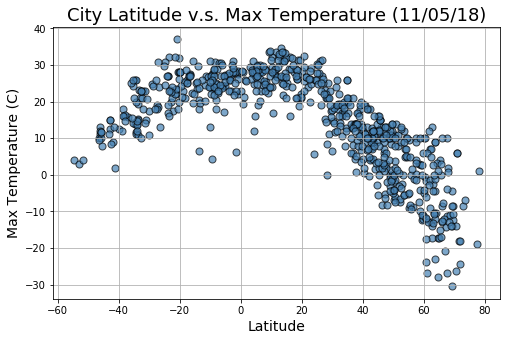

In [103]:
plt.figure(figsize=(8,5))
plt.title("City Latitude v.s. Max Temperature (11/05/18)", fontsize=18)
plt.scatter(cities_df['Lat'].astype(float), 
            cities_df['Max Temp'].astype(float), 
            marker='o', 
            facecolor='steelblue', 
            edgecolor='black',
            s=50, 
            alpha=0.7)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=14)
plt.grid()

In [ ]:
# Conclusion:
# The plot shows that maximum temperature reaches higher around 0 degress laitude or the equator.

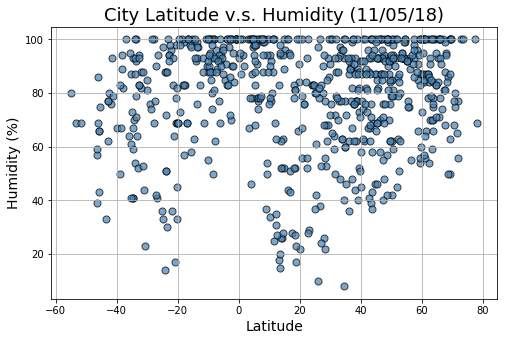

In [98]:
plt.figure(figsize=(8,5))
plt.title("City Latitude v.s. Humidity (11/05/18)", fontsize=18)
plt.scatter(cities_df['Lat'].astype(float), 
            cities_df['Humidity'].astype(float), 
            marker='o', 
            facecolor='steelblue', 
            edgecolor='black',
            s=50, 
            alpha=0.7)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.grid()

In [ ]:
# Conclusion:
# According to plot, humidity level tends to be uniformly higher right around the equator and varies more as we move away from it.

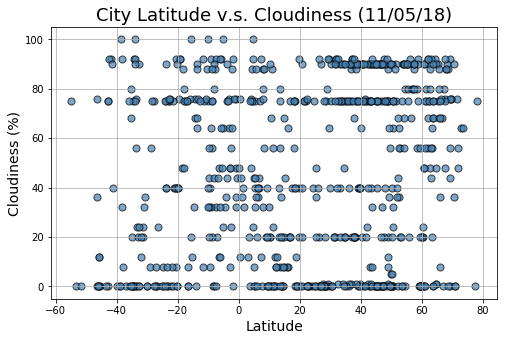

In [99]:
plt.figure(figsize=(8,5))
plt.title("City Latitude v.s. Cloudiness (11/05/18)", fontsize=18)
plt.scatter(cities_df['Lat'].astype(float), 
            cities_df['Cloudiness'].astype(float), 
            marker='o', 
            facecolor='steelblue', 
            edgecolor='black',
            s=50, 
            alpha=0.7)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.grid()

In [ ]:
# Conclusion:
# The plot shows that the amount of clouds tends to be slightly more varied around and equater, but the difference is not very obvious.

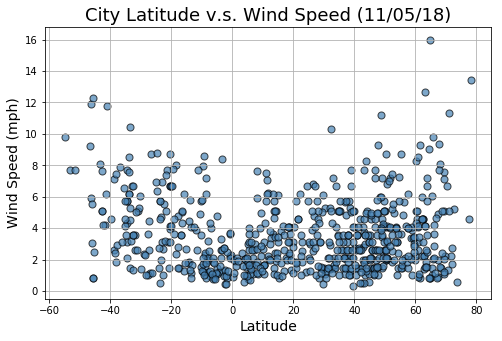

In [100]:
plt.figure(figsize=(8,5))
plt.title("City Latitude v.s. Wind Speed (11/05/18)", fontsize=18)
plt.scatter(cities_df['Lat'].astype(float), 
            cities_df['Wind Speed'].astype(float), 
            marker='o', 
            facecolor='steelblue', 
            edgecolor='black',
            s=50, 
            alpha=0.7)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.grid()

In [ ]:
# Conclusion: 
# According to the plot, wind is slower around the equator and picks up more speed as we move further away from it.

In [63]:
city_url = base_url.format(api_key, cities_df['City'][2], units)
city_request = requests.get(city_url).json()

print(json.dumps(city_request, indent=4, sort_keys=True))


{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -19.25,
        "lon": 17.72
    },
    "dt": 1541404800,
    "id": 3352593,
    "main": {
        "humidity": 36,
        "pressure": 1021,
        "temp": 27,
        "temp_max": 27,
        "temp_min": 27
    },
    "name": "Tsumeb",
    "sys": {
        "country": "NA",
        "id": 6914,
        "message": 0.0032,
        "sunrise": 1541390781,
        "sunset": 1541437154,
        "type": 1
    },
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 3.6
    }
}
